m
0.0054369212121212086
merr
4.2681065063653995e-05
q
0.00022272727272727315
qerr
0.00011392726789116838


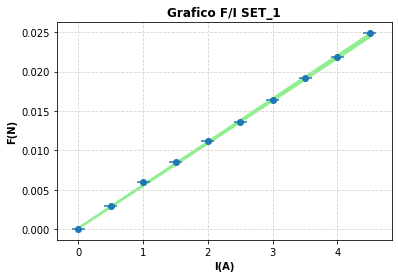

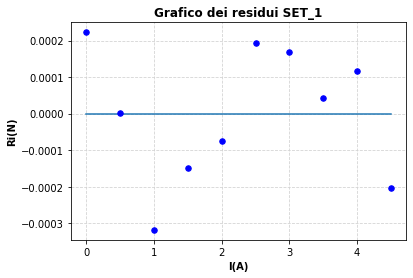

sigma_post_fit
0.00019383501262984544
m
0.005452363636363635
merr
5.267676577859084e-05
q
0.000432981818181819
qerr
0.00014060848757048493


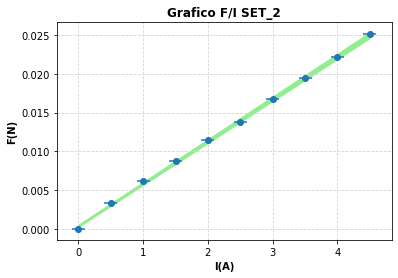

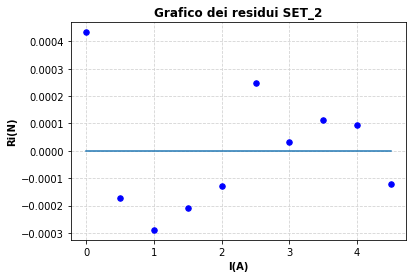

sigma_post_fit
0.00023923024284339348


In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()

#gli errori sulle masse considerati sono 0.014*2
#la sigma post fit nelle due simulazioni risulta di poco minore
#quindi è una buona stima dell'errore, forse, un po sovrastimato

F = np.array([0,0.00294,0.005978,0.008526,0.011172,0.013622,0.016366,0.019208,0.021854,0.024892])
F_err = np.ones(10)*9.80E-05
I = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
I_err = np.ones(10)*0.1

plt.title("Grafico F/I SET_1",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit


print("m")
print(m)
print("merr")
print(merr)
print("q")
print(q)
print("qerr")
print(qerr)


x = np.linspace(0,4.5,1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.show()
#fig.savefig(f'Fit_Parte1_SET1.pdf',dpi = 300)


Ff = q+m*I

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui SET_1",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("Ri(N)",fontweight="bold")
plt.plot(np.linspace(0,4.5,1000),np.zeros(1000))
plt.scatter(I,Ri, s=30, color='blue',zorder=3)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET1.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)



fig = plt.figure()
ax = fig.gca()

F = np.array([0,0.003332,0.006174,0.00882,0.011466,0.013818,0.016758,0.019404,0.022148,0.025088])
F_err = np.ones(10)*9.80E-05
I = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
I_err = np.ones(10)*0.1

plt.title("Grafico F/I SET_2",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("F(N)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
merr,qerr = np.sqrt(np.diag(cov))
m,q = fit


print("m")
print(m)
print("merr")
print(merr)
print("q")
print(q)
print("qerr")
print(qerr)


x = np.linspace(0,4.5,1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Fit_Parte1_SET2.pdf',dpi = 300)

Ff = q+m*I

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui SET_2",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("Ri(N)",fontweight="bold")
plt.plot(np.linspace(0,4.5,1000),np.zeros(1000))
plt.scatter(I,Ri, s=30, color='blue',zorder=3)
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
#fig.savefig(f'Residui_Parte1_SET2.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)